### Chyrtsalla Havadjia

## Identify patients with similar Genetic Fingerprints to Patient Z using Kmeans clustering


#### Import libraries and data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data_fingerprints = np.load('ps3_genetic_fingerprints.npy')
data_patient_z = np.load('ps3_patient_zet.npy')

In [3]:
df_fngrp = pd.DataFrame(data_fingerprints)
df_z = pd.DataFrame(data_patient_z)

In [4]:
df_fngrp.head(5)

,0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,384,385
0,2.638991,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,6.865746,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,6.548630,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.142371,...,0.0,0.00000,0.000000,0.0,0.0,0.0,3.076563,0.0,0.0,0.0
2,3.108633,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.547944,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,2.821922,0.0,0.0,0.0,0.0,0.0,0.0,0.969367,0.0,6.688834,...,0.0,1.44215,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,1.542966,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.947426,...,0.0,0.00000,0.000000,0.0,0.0,0.0,1.846165,0.0,0.0,0.0


____________________________________
### Data Exploration

In [5]:
df_fngrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Columns: 386 entries, 0 to 385
dtypes: float32(386)
memory usage: 21.2 MB


#### Some columns are only zeros 

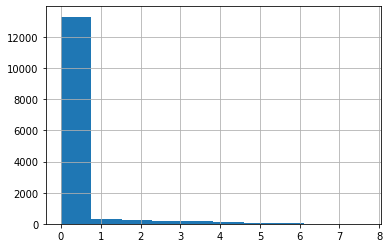

In [6]:
df_fngrp[7].hist()

In [7]:
df_z.head(5)

,0
0,4.143625
1,0.000000
2,0.000000
3,0.000000
4,0.000000


In [8]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       386 non-null    float32
dtypes: float32(1)
memory usage: 1.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b222382b0>]],
      dtype=object)

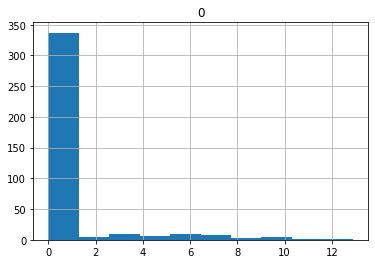

In [9]:
df_z.hist()

 ______________________________________________________________________
## Performing PCA
- sklearn PCA automatically standarizes data

In [10]:
X = df_fngrp.copy()

In [11]:
#create PCA instance
pca = PCA(n_components=386)
principalComponents = pca.fit_transform(X)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

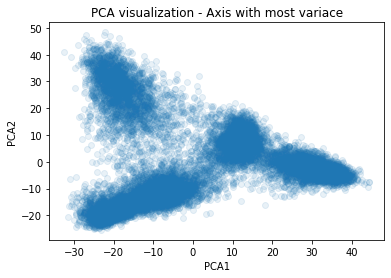

In [12]:
#visualize PCA
plt.scatter(PCA_components[0], PCA_components[1], alpha = 0.1)

plt.title("PCA visualization - Axis with most variace")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.show()

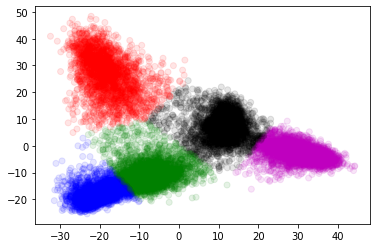

In [13]:
#clustering before PCA dimentionality reduction
model = model = KMeans(n_clusters=5)
model.fit(PCA_components.iloc[:,:2])


LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'k',
                   2 : 'b',
                   3 : 'g',
                   4 : 'm',
                   5 : 'c'
                   }

labels = model.predict(PCA_components.iloc[:,:2])
label_color = [LABEL_COLOR_MAP[l] for l in labels]


plt.scatter(PCA_components[0], PCA_components[1], 
            c=label_color, alpha = 0.1)

#### Check variances
- first 4 components explain the majority of the variance in our data. 

1.0000000417677188


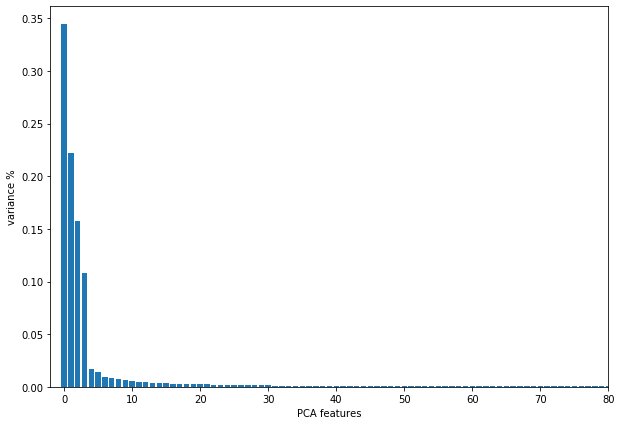

In [14]:
%matplotlib inline

features = range(pca.n_components_)

vari = sum(pca.explained_variance_ratio_)
print(vari)

plt.figure(figsize=(10,7))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.xlim(-2,80)
plt.ylabel('variance %')
plt.show()

#### Determine minimum number of dimentions required to maintain 95$\%$ of variance to assist with computations

In [15]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

32


#### The elbow in the curve indicates when the variances grows very slow. Reducing the dimentinality below 70 dimentions will not lose too much variance

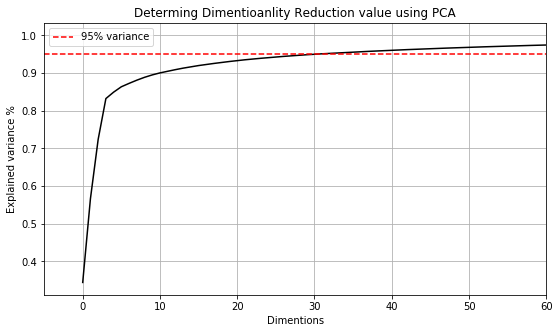

In [16]:
plt.figure(figsize=(9,5))

plt.plot(cumsum, color='black')
plt.axhline(y = 0.95, color='r', linestyle = '--', label='95% variance')
plt.xlim(-5,60)
plt.title("Determing Dimentioanlity Reduction value using PCA")
plt.xlabel('Dimentions')
plt.ylabel('Explained variance %')

plt.legend()
plt.grid()
plt.show()


In [17]:
#reduce dimentionality
# maintain 95% of variance
pca1 = PCA(n_components=0.95)
X_reduced = pca1.fit_transform(X)
X_reduced.shape

# Save components to a DataFrame
X_rd = pd.DataFrame(X_reduced)

 ____________________________________________________________________
## Identify optimum number of clusters
- Elbow method
- Silhouette coefficient

#### Elbow method
- The elbow indicates that after 5 clustes the inertia stops being significant. 

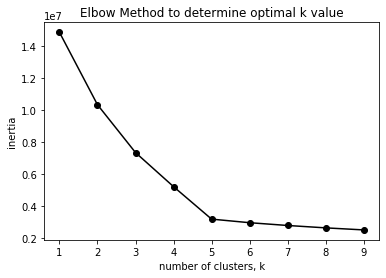

In [18]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_rd)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.title("Elbow Method to determine optimal k value")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#### Silhouette coefficients
- Silhouette coefficients offer a more precise nmber of clusters, but is more computationaly expensive
- This method indicates that the best number of clusters is 5
- Silhouette calculate each instance distance form the cluster its assigned and from the neighrest cluster

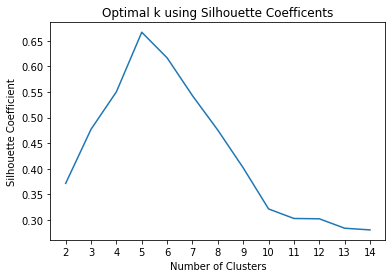

In [19]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
maxim  =15
# start at 2 clusters for silhouette coefficient
for k in range(2, maxim):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_rd.iloc[:,:4])
    
    score = silhouette_score(X_rd.iloc[:,:4], kmeans.labels_)
    silhouette_coefficients.append(score)
    

plt.plot(range(2, maxim), silhouette_coefficients)
plt.xticks(range(2, maxim))
plt.title("Optimal k using Silhouette Coefficents")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

plt.show()

#### Silhouette Diagram
- k = 5 is the ideal number of clusters
- the symetrical knife shape indicate all clusters have ewual number of instances.
- equal width of the knife shape indicates the silhouette coefficients (wider the better)

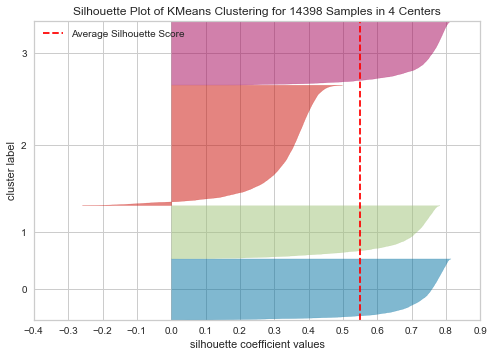

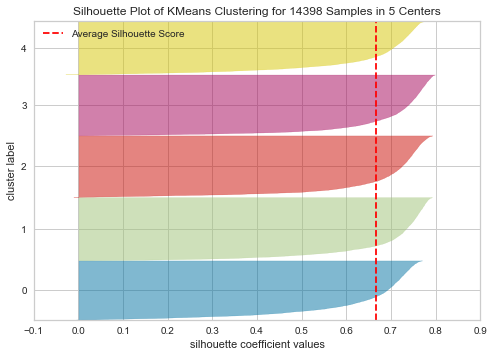

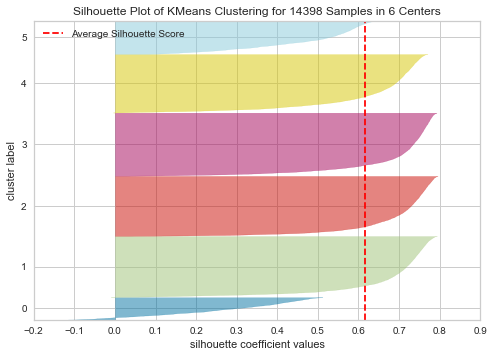

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer

ks = range(4, 7)

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X_rd.iloc[:,:4])       
    visualizer.show() 

 ____________________________________________________________________
## Performing k-means using k=5

#### Plot kMeans

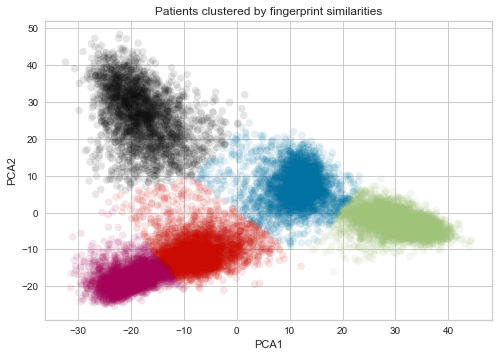

In [21]:
model = KMeans(n_clusters=5)
model.fit(X_rd.iloc[:,:2])


LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'k',
                   2 : 'b',
                   3 : 'g',
                   4 : 'm',
                   5 : 'c'
                   }

labels = model.predict(X_rd.iloc[:,:2])
label_color = [LABEL_COLOR_MAP[l] for l in labels]


plt.scatter(X_rd[0], X_rd[1], 
            c=label_color, alpha = 0.1)

plt.title("Patients clustered by fingerprint similarities")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

_________________________________________
## Find z - cluster

In [22]:
z_tran = df_z.T

principalComponents_Z = pca.transform(z_tran)
PCA_components_Z = pd.DataFrame(principalComponents_Z)

zlabels = model.predict(PCA_components_Z.iloc[:,:2])

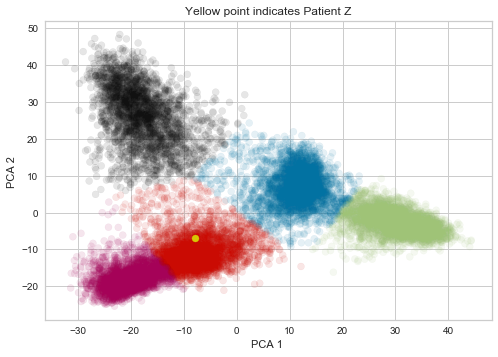

In [23]:
inx1 = 0
inx2 = 1

#plt.scatter(X_rd[0], X_rd[1], c=label_color, alpha = 0.1)
#plt.scatter(PCA_components_Z[0],PCA_components_Z[1], color='y')
plt.scatter(X_rd[inx1], X_rd[inx2], c=label_color, alpha = 0.1)
plt.scatter(PCA_components_Z[inx1],PCA_components_Z[inx2], color='y')

inx1 += 1
inx2 += 1

plt.title("Yellow point indicates Patient Z")
plt.xlabel('PCA %d '%inx1)
plt.ylabel('PCA %d '%inx2)
plt.show()



#### Determine number of people in same cluster with z
- there are 3123 people with similar genetics to patient z

In [24]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X_rd.index.values
cluster_map['cluster'] = model.labels_

In [25]:
count = []
count = cluster_map[cluster_map.cluster == int(zlabels)]
count.shape

(3124, 2)

In [26]:
count

,data_index,cluster
5,5,0
12,12,0
18,18,0
20,20,0
24,24,0
...,...,...
14364,14364,0
14380,14380,0
14382,14382,0
14389,14389,0
